# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [3]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [9]:
from keras.datasets import mnist
from keras.utils import to_categorical
import pandas as pd
import seaborn as sns

#### Load Data

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [8]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 38s 49ms/step - loss: 0.4690 - accuracy: 0.8487 - val_loss: 0.0718 - val_accuracy: 0.9775
Epoch 2/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0550 - accuracy: 0.9829 - val_loss: 0.0523 - val_accuracy: 0.9845
Epoch 3/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0509 - val_accuracy: 0.9843
Epoch 4/5
750/750 [==============================] - 36s 49ms/step - loss: 0.0261 - accuracy: 0.9924 - val_loss: 0.0424 - val_accuracy: 0.9879
Epoch 5/5
750/750 [==============================] - 37s 49ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0432 - val_accuracy: 0.9898


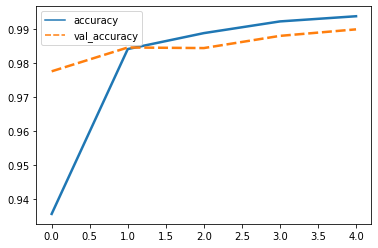

In [10]:
df_history = pd.DataFrame(history.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

#### evaluate model

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 9ms/step - loss: 0.0300 - accuracy: 0.9906


0.9905999898910522

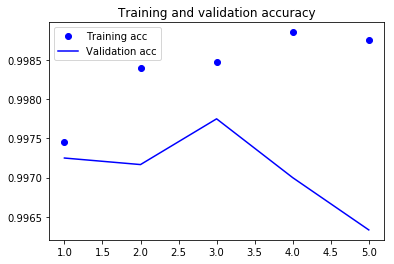

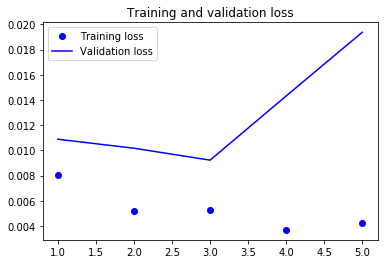

In [ ]:
# import matplotlib.pyplot as plt

# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [12]:
# model performance using sigmoid activation function.
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [13]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 37s 48ms/step - loss: 1.7087 - accuracy: 0.3985 - val_loss: 0.2685 - val_accuracy: 0.9238
Epoch 2/5
750/750 [==============================] - 36s 48ms/step - loss: 0.2338 - accuracy: 0.9334 - val_loss: 0.1295 - val_accuracy: 0.9602
Epoch 3/5
750/750 [==============================] - 36s 48ms/step - loss: 0.1181 - accuracy: 0.9642 - val_loss: 0.0850 - val_accuracy: 0.9738
Epoch 4/5
750/750 [==============================] - 36s 49ms/step - loss: 0.0898 - accuracy: 0.9715 - val_loss: 0.0802 - val_accuracy: 0.9754
Epoch 5/5
750/750 [==============================] - 36s 49ms/step - loss: 0.0695 - accuracy: 0.9778 - val_loss: 0.0630 - val_accuracy: 0.9804


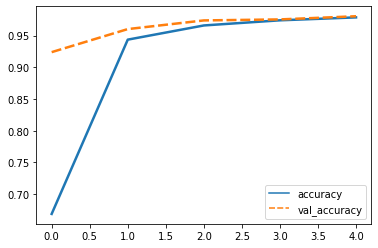

In [14]:
df_history = pd.DataFrame(history.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 8ms/step - loss: 0.0531 - accuracy: 0.9834


0.9833999872207642

In [16]:
# model performance using vanila cnn with sigmoid activation function.
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
flatten_2 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                432650    
Total params: 433,290
Trainable params: 433,290
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 24s 31ms/step - loss: 18.8695 - accuracy: 0.2899 - val_loss: 0.8850 - val_accuracy: 0.8825
Epoch 2/5
750/750 [==============================] - 23s 31ms/step - loss: 1.6408 - accuracy: 0.8029 - val_loss: 0.8913 - val_accuracy: 0.8487
Epoch 3/5
750/750 [==============================] - 23s 31ms/step - loss: 0.9522 - accuracy: 0.8406 - val_loss: 0.4476 - val_accuracy: 0.8938
Epoch 4/5
750/750 [==============================] - 23s 31ms/step - loss: 0.5966 - accuracy: 0.8597 - val_loss: 0.4520 - val_accuracy: 0.8702
Epoch 5/5
750/750 [==============================] - 23s 31ms/step - loss: 0.4238 - accuracy: 0.8757 - val_loss: 0.3601 - val_accuracy: 0.8937


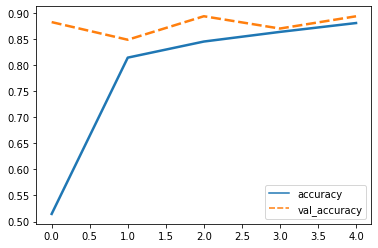

In [18]:
df_history = pd.DataFrame(history.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 2s 6ms/step - loss: 0.3644 - accuracy: 0.8927


0.8927000164985657